In [1]:
import pandas as pd

overdose = pd.read_csv('Overdose.csv')

#Filter for years after or at 2018. Removing the row containing the population for each
#county per year in order to avoid counting it towards the overdose count
mask = (overdose['Year'] >= 2018) & (overdose['Source']!= 'Population')
overdose = overdose[mask]

#Overdoses by years 2018, 2019, 2020
overdose = overdose.groupby(['County', 'Year'])["Count"].sum().reset_index()
overdose = overdose.rename(columns={'Count':'Overdoses'})
year18 = overdose[overdose["Year"] == 2018] 
year19 = overdose[overdose["Year"] == 2019] 
year20 = overdose[overdose["Year"] == 2020] 
overdose['2018 Overdoses'] = year18["Overdoses"]
overdose['2019 Overdoses'] = year19["Overdoses"]
overdose['2020 Overdoses'] = year20["Overdoses"]
overdose = overdose.drop(columns = ["Year", "Overdoses"]).groupby("County").sum().reset_index()
overdose.head(100)

,County,2018 Overdoses,2019 Overdoses,2020 Overdoses
0,Alamance,2263.0,2231.0,2351.0
1,Alexander,642.0,432.0,459.0
2,Alleghany,137.0,120.0,165.0
3,Anson,459.0,303.0,444.0
4,Ashe,370.0,347.0,322.0
...,...,...,...,...
95,Wayne,1613.0,2054.0,1658.0
96,Wilkes,1356.0,1158.0,1044.0
97,Wilson,817.0,988.0,1316.0
98,Yadkin,767.0,544.0,607.0


In [2]:
income = pd.read_csv('income.csv')

income = income.rename(columns={'Region': 'County', '2018' : '2018 Per Capita Income', '2019' : '2019 Per Capita Income', '2020' : '2020 Per Capita Income'})
income.head(100)

,County,2018 Per Capita Income,2019 Per Capita Income,2020 Per Capita Income
0,Alamance,39742,41256,43973
1,Alexander,36539,37758,40176
2,Alleghany,36576,37987,40599
3,Anson,35135,37741,38785
4,Ashe,34791,36643,39612
...,...,...,...,...
95,Wayne,38115,40116,42882
96,Wilkes,36445,37309,39518
97,Wilson,39158,40260,43111
98,Yadkin,37328,39012,41250


In [3]:
#merge together for our combined dataset
data = pd.merge(overdose, income, on = "County")

#Convert float to int
data['2018 Overdoses'] = data['2018 Overdoses'].astype(int)
data['2019 Overdoses'] = data['2019 Overdoses'].astype(int)
data['2020 Overdoses'] = data['2020 Overdoses'].astype(int)

data.head(100)

,County,2018 Overdoses,2019 Overdoses,2020 Overdoses,2018 Per Capita Income,2019 Per Capita Income,2020 Per Capita Income
0,Alamance,2263,2231,2351,39742,41256,43973
1,Alexander,642,432,459,36539,37758,40176
2,Alleghany,137,120,165,36576,37987,40599
3,Anson,459,303,444,35135,37741,38785
4,Ashe,370,347,322,34791,36643,39612
...,...,...,...,...,...,...,...
95,Wayne,1613,2054,1658,38115,40116,42882
96,Wilkes,1356,1158,1044,36445,37309,39518
97,Wilson,817,988,1316,39158,40260,43111
98,Yadkin,767,544,607,37328,39012,41250


In [4]:
population = pd.read_csv('county_estimates_2020.csv', sep = ";")
population = population.drop(columns = ["Estimate", "geom", "centroid"])
population["Year"] = pd.DatetimeIndex(population["Year"]).year
population = population.sort_values(["County", "Year"]).reset_index().drop(columns = "index")


#If year and county is the same, take the latest reported data for that year
population = population.drop_duplicates(subset = ['County','Year'], keep = 'last')

#rearrangement
population = population[population["Year"] >= 2018] 
year18 = population[population["Year"] == 2018] 
year19 = population[population["Year"] == 2019] 
year20 = population[population["Year"] == 2020] 

population = population.drop(columns = "Year")
population['2018 Population'] = year18["value"]
population['2019 Population'] = year19["value"]
population['2020 Population'] = year20["value"]
population = population.drop(columns = "value")
#overdose = overdose.drop(columns = ["Year", "Overdoses"]).groupby("County").sum().reset_index()

population = population.groupby("County").sum().reset_index()


#Convert to int
population['2018 Population'] = population['2018 Population'].astype(int)
population['2019 Population'] = population['2019 Population'].astype(int)
population['2020 Population'] = population['2020 Population'].astype(int)

population.head(100)

,County,2018 Population,2019 Population,2020 Population
0,Alamance,167407,169785,171980
1,Alexander,36664,36565,36444
2,Alleghany,10924,10919,10867
3,Anson,23075,21999,22030
4,Ashe,26591,26645,26577
...,...,...,...,...
95,Wayne,117851,117947,117333
96,Wilkes,66445,66189,65827
97,Wilson,78585,78991,78784
98,Yadkin,37251,37247,37187


In [5]:
#Combine pop with data
data["2018 Overdoses Per Capita"] = data["2018 Overdoses"] / population["2018 Population"]
data["2019 Overdoses Per Capita"] = data["2019 Overdoses"] / population["2019 Population"]
data["2020 Overdoses Per Capita"] = data["2020 Overdoses"] / population["2020 Population"]
data = pd.merge(data, population)
data = data.round(decimals = 3)


#Final Dataset
finalData = data
finalData.head(100)

,County,2018 Overdoses,2019 Overdoses,2020 Overdoses,2018 Per Capita Income,2019 Per Capita Income,2020 Per Capita Income,2018 Overdoses Per Capita,2019 Overdoses Per Capita,2020 Overdoses Per Capita,2018 Population,2019 Population,2020 Population
0,Alamance,2263,2231,2351,39742,41256,43973,0.014,0.013,0.014,167407,169785,171980
1,Alexander,642,432,459,36539,37758,40176,0.018,0.012,0.013,36664,36565,36444
2,Alleghany,137,120,165,36576,37987,40599,0.013,0.011,0.015,10924,10919,10867
3,Anson,459,303,444,35135,37741,38785,0.020,0.014,0.020,23075,21999,22030
4,Ashe,370,347,322,34791,36643,39612,0.014,0.013,0.012,26591,26645,26577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wayne,1613,2054,1658,38115,40116,42882,0.014,0.017,0.014,117851,117947,117333
96,Wilkes,1356,1158,1044,36445,37309,39518,0.020,0.017,0.016,66445,66189,65827
97,Wilson,817,988,1316,39158,40260,43111,0.010,0.013,0.017,78585,78991,78784
98,Yadkin,767,544,607,37328,39012,41250,0.021,0.015,0.016,37251,37247,37187


<AxesSubplot:xlabel='2018 Per Capita Income', ylabel='2018 Overdoses Per Capita'>

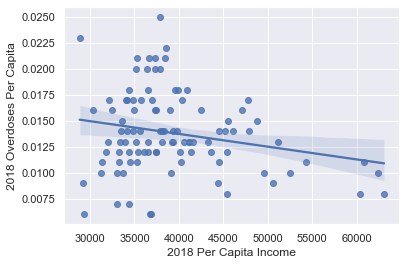

In [6]:
import seaborn as sns

#Creating a scatter plot of income vs overdoses per capita each individual year
#Then, all 3 years combined into one plot (esentially each county is represented 3 times in last graph, once for each year 18, 19, 20)
# Instead of using relplot, regplot was used in order to automatically create a best fit line for each graph
sns.set_theme()
sns.regplot(x='2018 Per Capita Income', y="2018 Overdoses Per Capita", data=finalData)

<AxesSubplot:xlabel='2019 Per Capita Income', ylabel='2019 Overdoses Per Capita'>

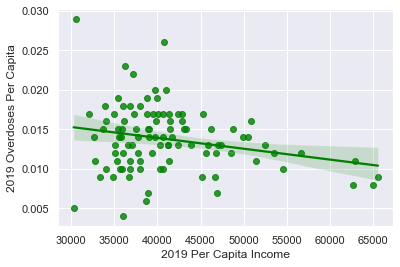

In [7]:
sns.regplot(x='2019 Per Capita Income', y="2019 Overdoses Per Capita", data=finalData, color = 'green')

<AxesSubplot:xlabel='2020 Per Capita Income', ylabel='2020 Overdoses Per Capita'>

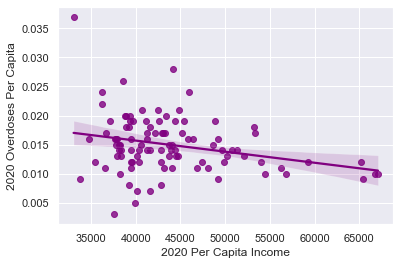

In [8]:
sns.regplot(x='2020 Per Capita Income', y="2020 Overdoses Per Capita", data=finalData, color ='purple')

<AxesSubplot:xlabel='Per Capita Income (18-20)', ylabel='Overdoses Per Capita (18-20)'>

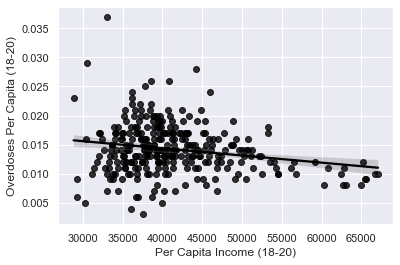

In [9]:
df_18 = finalData[['2018 Overdoses Per Capita', '2018 Per Capita Income']].copy()
df_19 = finalData[['2019 Overdoses Per Capita', '2019 Per Capita Income']].copy()
df_20 = finalData[['2020 Overdoses Per Capita', '2020 Per Capita Income']].copy()

df_18.rename(columns = {'2018 Overdoses Per Capita':'Overdoses Per Capita (18-20)',
                                                '2018 Per Capita Income':'Per Capita Income (18-20)'}, inplace = True)

df_19.rename(columns = {'2019 Overdoses Per Capita':'Overdoses Per Capita (18-20)',
                                                '2019 Per Capita Income':'Per Capita Income (18-20)'}, inplace = True)

df_20.rename(columns = {'2020 Overdoses Per Capita':'Overdoses Per Capita (18-20)',
                                                '2020 Per Capita Income':'Per Capita Income (18-20)'}, inplace = True)

allpoints = pd.concat([df_18, df_19, df_20], axis=0, ignore_index=True)

sns.regplot(x='Per Capita Income (18-20)', y="Overdoses Per Capita (18-20)", data=allpoints, color ='black')


<AxesSubplot:xlabel='2020 Per Capita Income', ylabel='2020 Overdoses Per Capita'>

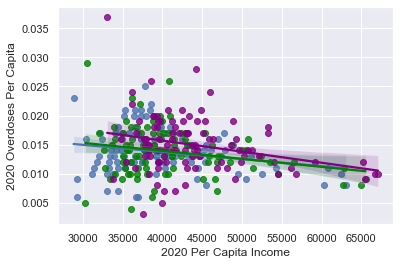

In [10]:
#This is the same graph as the one above (black graph), where each county is plotted for each year 2018-2020, but stylized in a way where each color represents a year

sns.regplot(x='2018 Per Capita Income', y="2018 Overdoses Per Capita", data=finalData)
sns.regplot(x='2019 Per Capita Income', y="2019 Overdoses Per Capita", data=finalData, color = 'green')
sns.regplot(x='2020 Per Capita Income', y="2020 Overdoses Per Capita", data=finalData, color ='purple') ####RENAME SO GRAPH SAYS SAME AS BLACK GRAPH


In [11]:
#Graphs above show a best fit line automatically generated by sns.regplot, but now we will perform our own linear regression on each year as well (as the data set containing
#all the data points) to find an MSE and r^2 value

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

data2018 = finalData[['2018 Per Capita Income']].values
target2018 = finalData['2018 Overdoses Per Capita'].values

linear_model2018 = LinearRegression()
linear_model2018.fit(X = data2018, y = target2018)

predicted2018 = linear_model2018.predict(data2018)

mse2018 = mean_squared_error(target2018, predicted2018)
r2_2018 = r2_score(target2018, predicted2018) 


median2018 = np.median(finalData['2018 Overdoses Per Capita'])
baseline2018 = np.full(predicted2018.shape, median2018)

base_mse2018 = mean_squared_error(target2018, baseline2018) 
base_r2_2018 = r2_score(target2018, baseline2018)


print("Model MSE 2018:", mse2018)
print("r^2 2018:", r2_2018)
print("Baseline MSE 2018:", base_mse2018)
print("r^2 2018:", base_r2_2018)



Model MSE 2018: 1.4351285373739353e-05
r^2 2018: 0.0488026343660124
Baseline MSE 2018: 1.576e-05
r^2 2018: -0.04456639889710767


In [12]:
data2019 = finalData[['2019 Per Capita Income']].values
target2019 = finalData['2019 Overdoses Per Capita'].values

linear_model2019 = LinearRegression()
linear_model2019.fit(X = data2019, y = target2019)

predicted2019 = linear_model2019.predict(data2019)

mse2019 = mean_squared_error(target2019, predicted2019)
r2_2019 = r2_score(target2019, predicted2019) 


median2019 = np.median(finalData['2019 Overdoses Per Capita'])
baseline2019 = np.full(predicted2019.shape, median2019)

base_mse2019 = mean_squared_error(target2019, baseline2019) 
base_r2_2019 = r2_score(target2019, baseline2019)


print("Model MSE 2019:", mse2019)
print("r^2 2019:", r2_2019)
print("Baseline MSE 2019:", base_mse2019)
print("r^2 2019:", base_r2_2019)

Model MSE 2019: 1.561666522621682e-05
r^2 2019: 0.05793744224159736
Baseline MSE 2019: 1.663e-05
r^2 2019: -0.003191149235993951


In [13]:
data2020 = finalData[['2020 Per Capita Income']].values
target2020 = finalData['2020 Overdoses Per Capita'].values

linear_model2020 = LinearRegression()
linear_model2020.fit(X = data2020, y = target2020)

predicted2020 = linear_model2020.predict(data2020)

mse2020 = mean_squared_error(target2020, predicted2020)
r2_2020 = r2_score(target2020, predicted2020) 


median2020 = np.median(finalData['2020 Overdoses Per Capita'])
baseline2020 = np.full(predicted2020.shape, median2020)

base_mse2020 = mean_squared_error(target2020, baseline2020) 
base_r2_2020 = r2_score(target2020, baseline2020)


print("Model MSE 2020:", mse2020)
print("r^2 2020:", r2_2020)
print("Baseline MSE 2020:", base_mse2020)
print("r^2 2020:", base_r2_2020)

Model MSE 2020: 2.169677098603962e-05
r^2 2020: 0.07551755346222833
Baseline MSE 2020: 2.4410000000000005e-05
r^2 2020: -0.040091013289815125
